In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 data for illustration purposes
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Assuming you have labels as strings, encode them to numerical values
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels.squeeze())
test_labels = label_encoder.transform(test_labels.squeeze())

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Define the neural network model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='sigmoid')  # Assuming 10 classes for CIFAR-10
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 141s 112ms/step - loss: 1.3497 - accuracy: 0.5173 - val_loss: 1.1079 - val_accuracy: 0.6201
Epoch 2/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.9748 - accuracy: 0.6590 - val_loss: 0.9426 - val_accuracy: 0.6754
Epoch 3/10
1250/1250 [==============================] - 137s 110ms/step - loss: 0.8055 - accuracy: 0.7182 - val_loss: 0.9098 - val_accuracy: 0.6931
Epoch 4/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.6600 - accuracy: 0.7701 - val_loss: 0.9006 - val_accuracy: 0.7046
Epoch 5/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.5249 - accuracy: 0.8181 - val_loss: 1.0849 - val_accuracy: 0.6778
Epoch 6/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4000 - accuracy: 0.8609 - val_loss: 1.0205 - val_accuracy: 0.7000
Epoch 7/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.3050 - accuracy: 0.8930 - val_

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 10s 31ms/step - loss: 1.7837 - accuracy: 0.6623
Test Accuracy: 0.6622999906539917


In [ ]:
# Save the trained model for future use
model.save('pixelpro_model.keras')

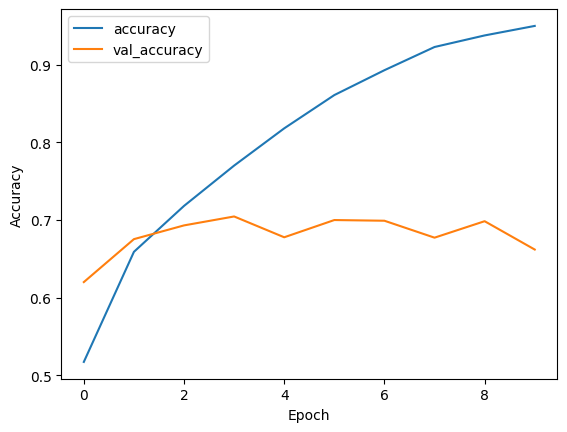

In [ ]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 5s 16ms/step - loss: 1.2431 - accuracy: 0.6852
Test Accuracy: 0.6851999759674072


In [ ]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 7s 23ms/step


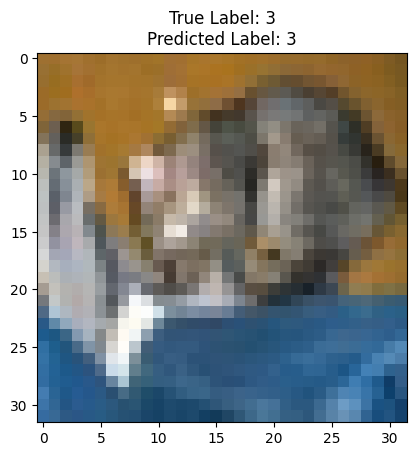

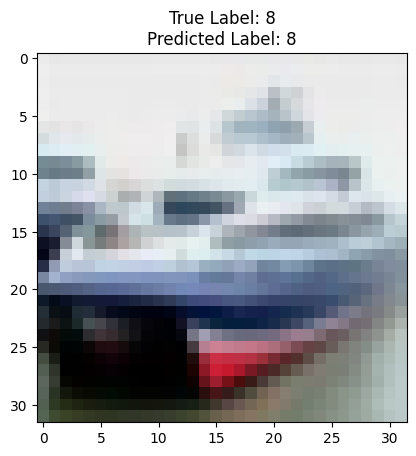

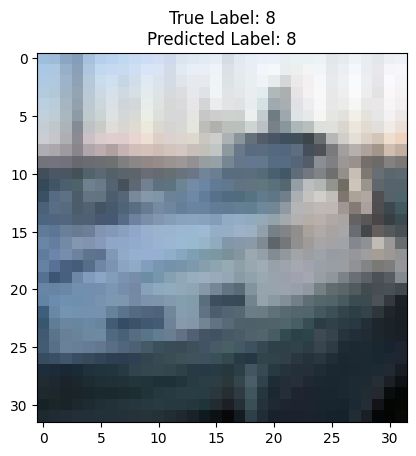

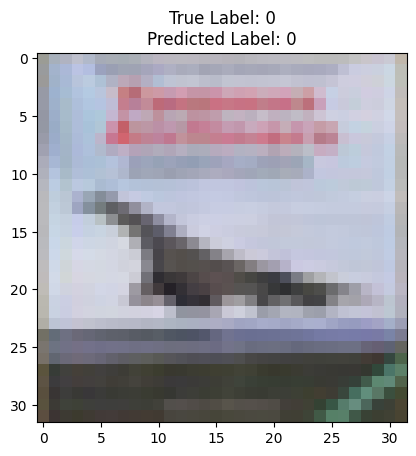

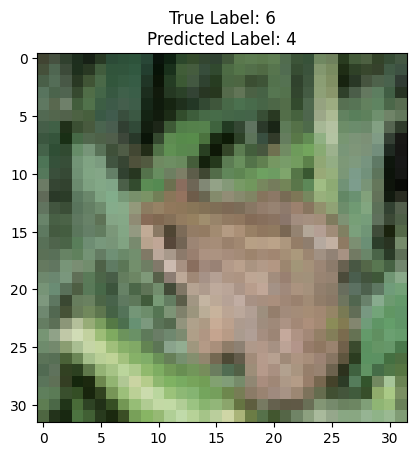

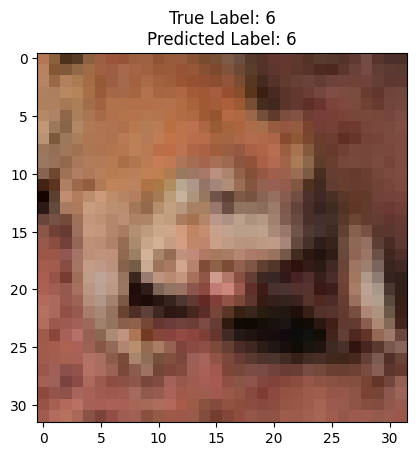

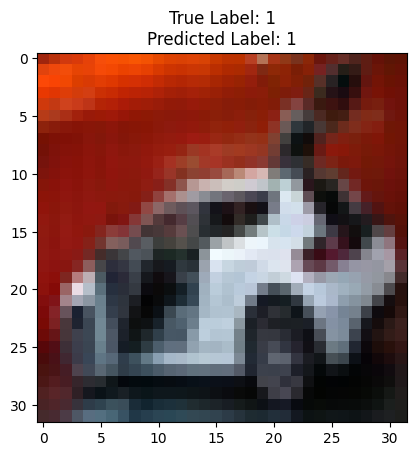

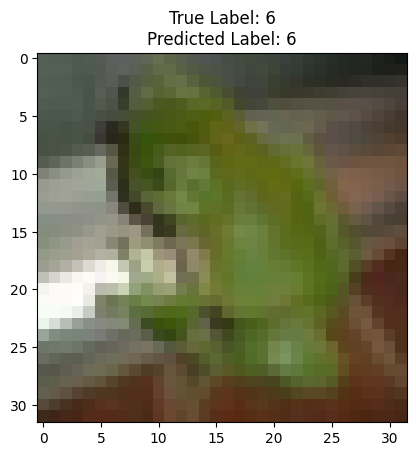

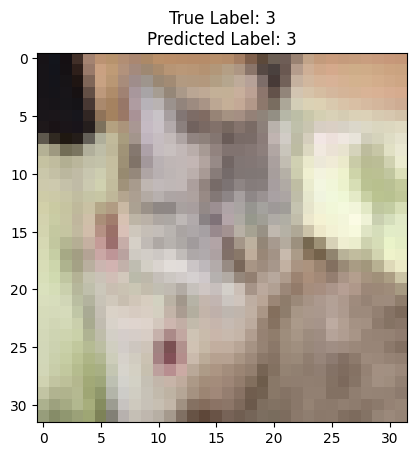

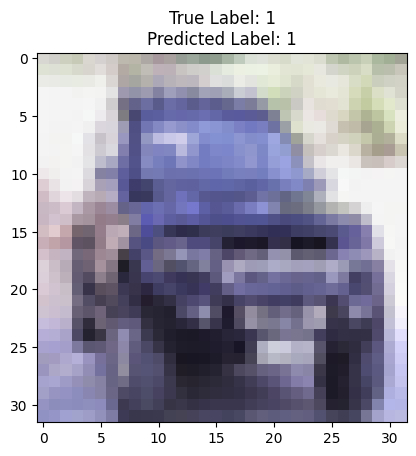

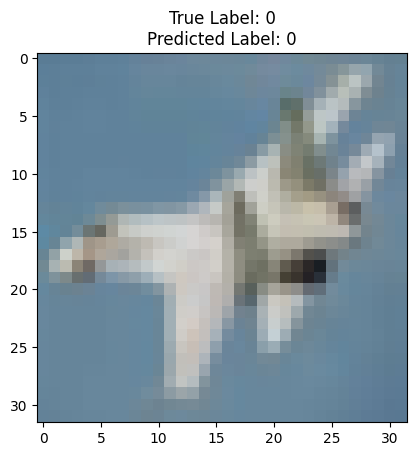

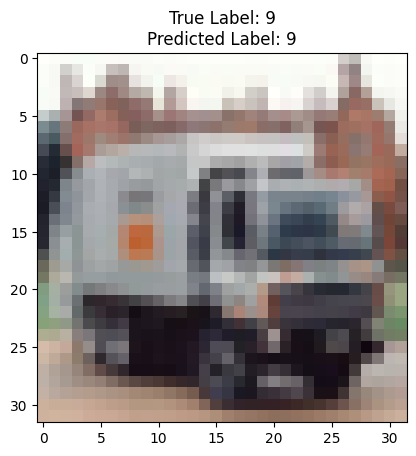

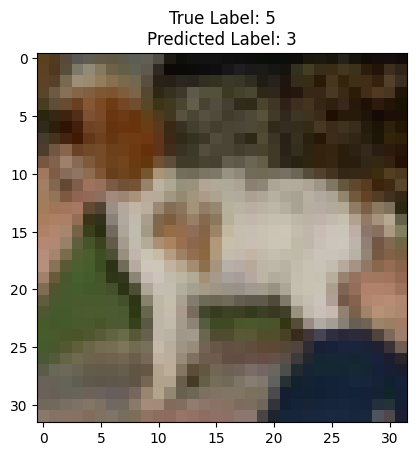

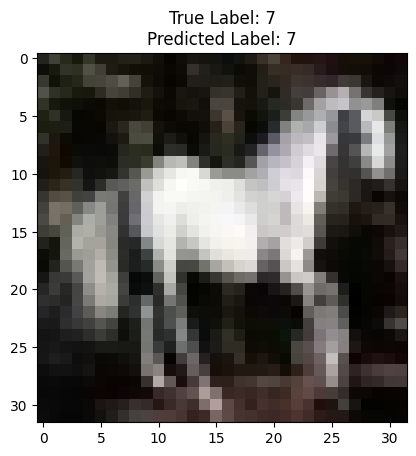

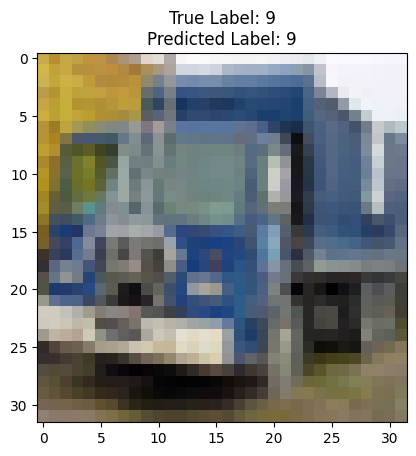

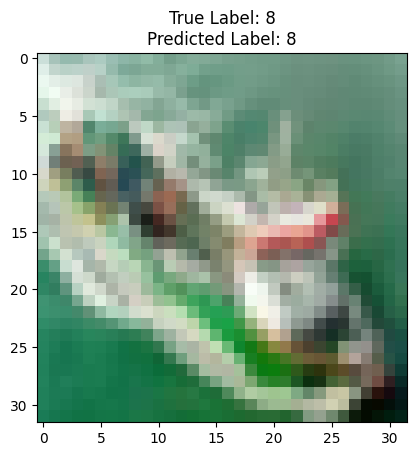

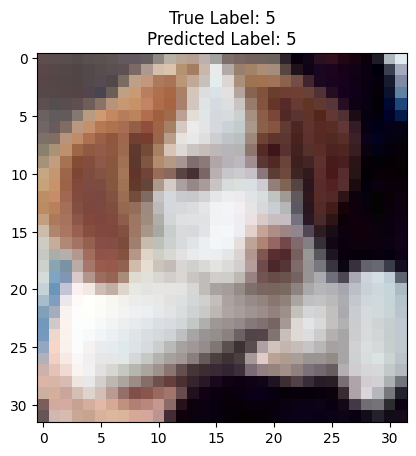

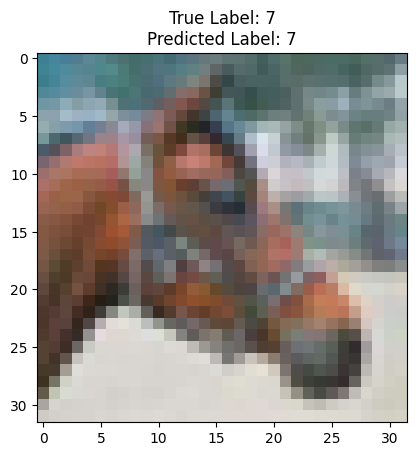

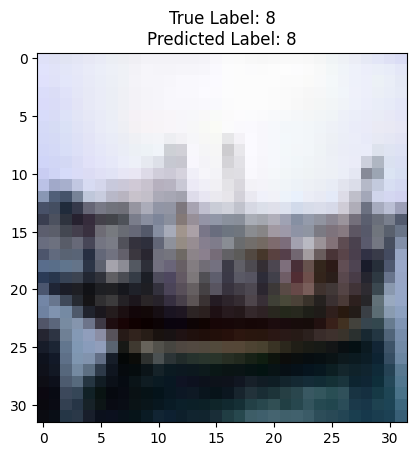

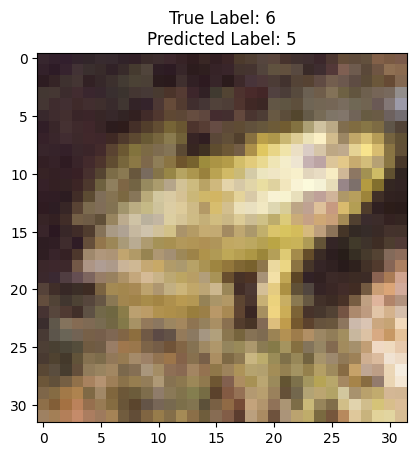

In [ ]:
num_display=20
for i in range(num_display):
    plt.imshow(test_images[i])
    plt.title(f'True Label: {label_encoder.inverse_transform([test_labels[i]])[0]}\nPredicted Label: {label_encoder.inverse_transform([predicted_labels[i]])[0]}')
    plt.show()


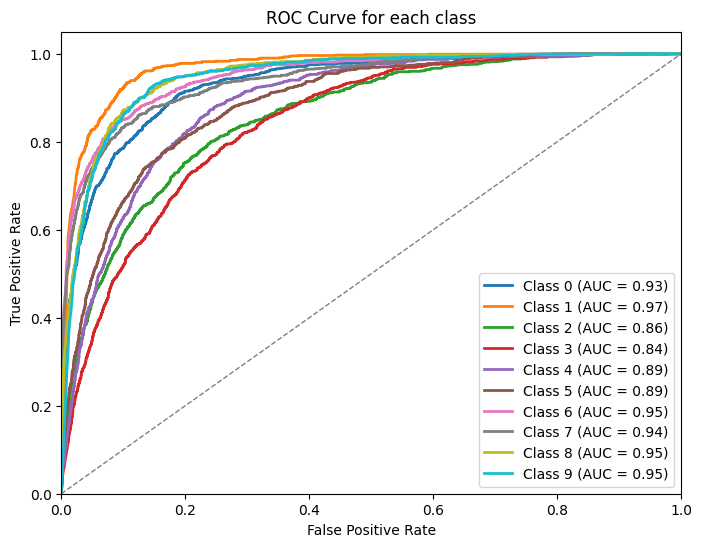

In [25]:
# Compute ROC curve and ROC area for each class
num_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    true_labels_one_hot = (test_labels == i).astype(int)
    predicted_probs = predictions[:, i]

    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot, predicted_probs)
    roc_auc[i] = roc_auc_score(true_labels_one_hot, predicted_probs)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6583


In [29]:
# Calculate precision, recall, and F1-score for each class
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.6710
Recall: 0.6583
F1-Score: 0.6563


In [30]:

# Display the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[784  25  44  11  22   4   2  13  67  28]
 [ 24 874   9   4   1   6   1   6  28  47]
 [ 93  21 622  66  51  49  11  56  20  11]
 [ 53  23  87 512  40 144  14  56  37  34]
 [ 42  18 111  80 522  50  22 123  20  12]
 [ 23  19  99 189  27 523   5  77  23  15]
 [ 13  34  99 142  34  47 558  22  37  14]
 [ 26  14  42  35  31  65   3 750   7  27]
 [102  56  17   7   7   6   1   8 776  20]
 [ 47 188  13  12   0   8   1  12  57 662]]
